In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
nb = 100

dist = np.random.uniform(0, 6, nb)
theta = np.random.uniform(0, np.pi*2, nb)
cosine = np.cos(theta)
sine = np.sin(theta)
r = np.ones(nb)

In [7]:
a = torch.from_numpy(np.column_stack((dist, cosine, sine, r, r)))

In [33]:
def calculate_interaction(dist, cosine, sine, rad1, rad2, k, epsilon):
    """
    Given the vectors ri and rj, compute the force between them
    """

    dist = dist.unsqueeze(-1)
    cosine = cosine.unsqueeze(-1)
    sine = sine.unsqueeze(-1)
    rad1 = rad1.unsqueeze(-1)
    rad2 = rad2.unsqueeze(-1)

    dist_x = cosine * dist
    dist_y = sine * dist

    rij = torch.hstack((dist_x.reshape(-1, 1), dist_y.reshape(-1, 1)))


    r = dist

    # Combined radius of both particles (assume unit radii for now)
    #bij = 2.0                       # Ri + Rj 
    bij = rad1 + rad2

    force = torch.zeros((dist.shape[0], 2))

    force = torch.where(r < bij*(1 + epsilon), k*(r - bij)*rij/r, -k*(r - bij - 2*epsilon*bij)*rij/r)
    force = torch.where(r >= bij*(1 + 2*epsilon), torch.tensor([0.0, 0.0]), force)


    return force

In [30]:
print()

In [31]:
print(a.shape)

torch.Size([100, 5])


In [32]:
res = calculate_interaction(a[:, 0], a[:, 1], a[:, 2], a[:, 3], a[:, 4], 0.6, 0.5)

torch.Size([100, 2])
torch.Size([100, 1])
torch.Size([100, 2])
torch.Size([100, 2])


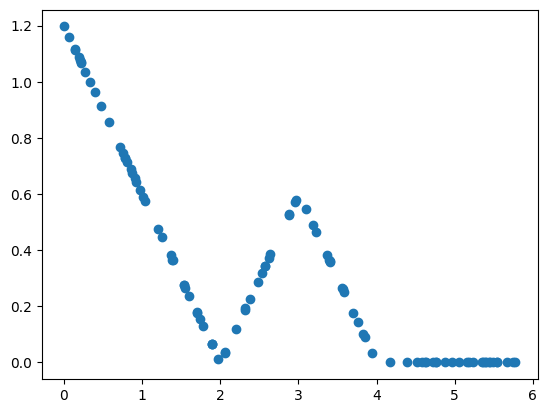

In [36]:
res_test = torch.sqrt(res[:, 0] ** 2 + res[:, 1] ** 2)

plt.scatter(dist, res_test)
plt.show()